# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    y = x**2*numpy.sin(x)
    return y;

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    y = 2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x) - 2
    return y;

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    y = g(xmax) - g(xmin)
    return y;

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax - xmin) / N
    x_n = numpy.linspace(xmin, xmax, N+1)
    m_n = x_n + dx/2
    m_n = numpy.delete(m_n, N)
    integral = dx/6*(numpy.sum(2*f(x_n)) + 4*numpy.sum(f(m_n)) - f(x_n[0])-f(x_n[N]))
    return integral;

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


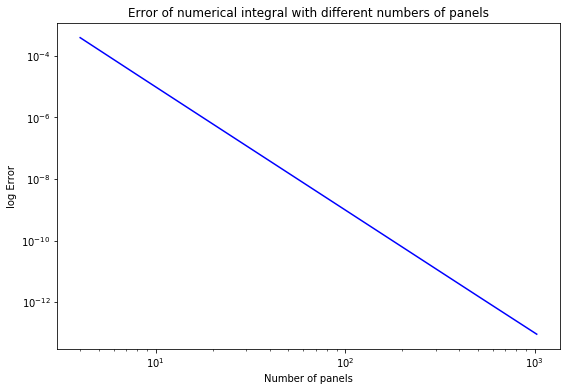

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

error = []

for N in panel_counts:
    inte = integrate_numeric(x0, x1, N)
    difference = result_analytic - inte
    error.append(difference)

fig = plt.figure(figsize = (9,6))
ax = plt.axes()

ax.loglog(panel_counts, error, c='blue')
ax.set(
       ylabel = 'log Error', 
       xlabel = 'Number of panels', 
       title = 'Error of numerical integral with different numbers of panels')

plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels are increased, the accuracy of the numerical method increases. The increase is exponential, so relatively small number of computation will yield an accurate numerical approximation. However, as in numerical differentiation, if the number of panels become too big, it will loose accuracy due to numerical errors. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Simpson method decreases the error as N to the power of -4. Trapezium rule decreases the error as N to the power of -2. So Simpson method decreases the number of count faster than the trapezium rule. Which means if the trapezium rule was used, for the same number of panels, it will be less accurate than with Simposon rule. So the line on the graph will be a line with smaller gradient than what is shown above. 